In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [89]:
ruta = os.path.join("..", "data", "post_pandemic_remote_work_health_impact_2025.csv")

In [90]:
data = pd.read_csv(ruta, delimiter = ",")
data.head(10)


,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,NaN,Medium,5,NaN,4,$60K-80K
5,2025-06-01,52,Male,Oceania,Customer Service,Business Analyst,Onsite,61,Burnout,Medium,4,Back Pain; Shoulder Pain,3,$60K-80K
6,2025-06-01,50,Female,Asia,Manufacturing,IT Support,Onsite,62,NaN,Medium,4,Back Pain; Shoulder Pain; Wrist Pain,2,$80K-100K
7,2025-06-01,63,Non-binary,Europe,Professional Services,Technical Writer,Onsite,55,Anxiety,High,3,NaN,2,$100K-120K
8,2025-06-01,30,Female,South America,Technology,Software Engineer,Remote,47,Anxiety,Medium,2,Neck Pain,4,$60K-80K
9,2025-06-01,37,Female,Asia,Finance,HR Manager,Onsite,55,Burnout,Medium,5,Back Pain,1,$60K-80K


In [91]:
data1 = data.dropna(subset=[
    "Work_Arrangement",
    "Hours_Per_Week",
    "Burnout_Level",
    "Work_Life_Balance_Score",
    "Social_Isolation_Score"
])
data1

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,NaN,Medium,5,NaN,4,$60K-80K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3152,2025-06-26,62,Female,South America,Professional Services,Data Analyst,Hybrid,38,PTSD,Medium,4,Shoulder Pain; Neck Pain,3,$80K-100K
3153,2025-06-26,24,Female,South America,Professional Services,Software Engineer,Remote,54,NaN,Medium,4,Eye Strain,4,$100K-120K
3154,2025-06-26,45,Female,North America,Professional Services,HR Manager,Onsite,59,PTSD,Medium,1,Shoulder Pain,3,$40K-60K
3155,2025-06-26,38,Male,North America,Education,Operations Manager,Onsite,52,Depression,Medium,3,Shoulder Pain; Eye Strain; Neck Pain,5,$80K-100K


In [92]:
print(data.columns)

#eliminamos duplicados
data = data.drop_duplicates()

#vemos los datos totales
print(len(data))
data

Index(['Survey_Date', 'Age', 'Gender', 'Region', 'Industry', 'Job_Role',
       'Work_Arrangement', 'Hours_Per_Week', 'Mental_Health_Status',
       'Burnout_Level', 'Work_Life_Balance_Score', 'Physical_Health_Issues',
       'Social_Isolation_Score', 'Salary_Range'],
      dtype='object')
3157


,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,NaN,Medium,5,NaN,4,$60K-80K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3152,2025-06-26,62,Female,South America,Professional Services,Data Analyst,Hybrid,38,PTSD,Medium,4,Shoulder Pain; Neck Pain,3,$80K-100K
3153,2025-06-26,24,Female,South America,Professional Services,Software Engineer,Remote,54,NaN,Medium,4,Eye Strain,4,$100K-120K
3154,2025-06-26,45,Female,North America,Professional Services,HR Manager,Onsite,59,PTSD,Medium,1,Shoulder Pain,3,$40K-60K
3155,2025-06-26,38,Male,North America,Education,Operations Manager,Onsite,52,Depression,Medium,3,Shoulder Pain; Eye Strain; Neck Pain,5,$80K-100K


In [93]:
#eliminamos none
#data = data.dropna()

In [94]:
traducimos_columnas = {
'Survey_Date': 'Fecha_de_encuesta',
'Age': 'Edad',
'Gender': 'Género',
'Region': 'Región',
'Industry': 'Industria',
'Job_Role': 'Rol_laboral',
'Work_Arrangement': 'Ubicación_de_trabajo',
'Hours_Per_Week': 'Horas_por_semana',
'Mental_Health_Status': 'Estado_de_salud_mental',
'Burnout_Level': 'Nivel_de_agotamiento',
'Work_Life_Balance_Score': 'Equilibrio_entre_vida_laboral_y_personal',
'Physical_Health_Issues': 'Problemas_de_salud_físico',
'Social_Isolation_Score': 'Puntuación_de_aislamiento_social',
'Salary_Range': 'Rango_salarial',

}
data.rename(columns=traducimos_columnas,inplace=True)

print(data.columns)

Index(['Fecha_de_encuesta', 'Edad', 'Género', 'Región', 'Industria',
       'Rol_laboral', 'Ubicación_de_trabajo', 'Horas_por_semana',
       'Estado_de_salud_mental', 'Nivel_de_agotamiento',
       'Equilibrio_entre_vida_laboral_y_personal', 'Problemas_de_salud_físico',
       'Puntuación_de_aislamiento_social', 'Rango_salarial'],
      dtype='object')


In [95]:
# Eliminar columnas que no aportan al análisis
data.drop(['Género', 'Industria'], axis=1, inplace=True)
data.head(10)

,Fecha_de_encuesta,Edad,Región,Rol_laboral,Ubicación_de_trabajo,Horas_por_semana,Estado_de_salud_mental,Nivel_de_agotamiento,Equilibrio_entre_vida_laboral_y_personal,Problemas_de_salud_físico,Puntuación_de_aislamiento_social,Rango_salarial
0,2025-06-01,27,Asia,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Asia,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Africa,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Europe,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,South America,DevOps Engineer,Hybrid,65,NaN,Medium,5,NaN,4,$60K-80K
5,2025-06-01,52,Oceania,Business Analyst,Onsite,61,Burnout,Medium,4,Back Pain; Shoulder Pain,3,$60K-80K
6,2025-06-01,50,Asia,IT Support,Onsite,62,NaN,Medium,4,Back Pain; Shoulder Pain; Wrist Pain,2,$80K-100K
7,2025-06-01,63,Europe,Technical Writer,Onsite,55,Anxiety,High,3,NaN,2,$100K-120K
8,2025-06-01,30,South America,Software Engineer,Remote,47,Anxiety,Medium,2,Neck Pain,4,$60K-80K
9,2025-06-01,37,Asia,HR Manager,Onsite,55,Burnout,Medium,5,Back Pain,1,$60K-80K


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Fecha_de_encuesta                         3157 non-null   object
 1   Edad                                      3157 non-null   int64 
 2   Región                                    3157 non-null   object
 3   Rol_laboral                               3157 non-null   object
 4   Ubicación_de_trabajo                      3157 non-null   object
 5   Horas_por_semana                          3157 non-null   int64 
 6   Estado_de_salud_mental                    2358 non-null   object
 7   Nivel_de_agotamiento                      3157 non-null   object
 8   Equilibrio_entre_vida_laboral_y_personal  3157 non-null   int64 
 9   Problemas_de_salud_físico                 2877 non-null   object
 10  Puntuación_de_aislamiento_social          3157 n

In [97]:

for col in ["Puntuación_de_aislamiento_social", "Equilibrio_entre_vida_laboral_y_personal", "Horas_por_semana"]:
    data[col] = pd.to_numeric(data[col], errors="coerce")

mapeo_burnout = {
    'Low': 'Bajo',
    'Medium': 'Medio', 
    'High': 'Alto'
}
data['Nivel_de_agotamiento'] = data['Nivel_de_agotamiento'].replace(mapeo_burnout)

mapeo_modalidad = {
    'Hybrid': 'Híbrido',
    'Onsite': 'Presencial', 
    'Remote': 'Remoto'
}
data['Ubicación_de_trabajo'] = data['Ubicación_de_trabajo'].replace(mapeo_modalidad)

tabla_medias = (
    data
    .groupby("Ubicación_de_trabajo")[["Puntuación_de_aislamiento_social",
                                    "Equilibrio_entre_vida_laboral_y_personal",
                                    "Horas_por_semana"]]
    .mean()
    .rename(columns={
        "Puntuación_de_aislamiento_social": "Aislamiento_promedio",
        "Equilibrio_entre_vida_laboral_y_personal": "Equilibrio_vida_promedio",
        "Horas_por_semana": "Horas_semana_promedio"
    })
    .round(2)
)
tabla_burnout = (data.groupby(["Ubicación_de_trabajo", "Nivel_de_agotamiento"]).size()
.unstack(fill_value=0))

if set(["Bajo", "Medio", "Alto"]).issubset(tabla_burnout.columns):
    tabla_burnout = tabla_burnout[["Bajo", "Medio", "Alto"]]

tabla_burnout_pct = (tabla_burnout.div(tabla_burnout.sum(axis=1), axis=0) * 100).round(1)

final = pd.concat([tabla_medias, tabla_burnout_pct],
axis=1,keys=["Promedios", "Burnout (%)"])

final.index.name = "Modalidad_de_trabajo"

final

Promedios                           \
                     Aislamiento_promedio Equilibrio_vida_promedio   
Modalidad_de_trabajo                                                 
Híbrido                              2.75                     2.95   
Presencial                           2.38                     3.03   
Remoto                               3.50                     2.99   

                                           Burnout (%)              
                     Horas_semana_promedio        Bajo Medio  Alto  
Modalidad_de_trabajo                                                
Híbrido                              49.85        19.2  45.1  35.7  
Presencial                           49.96        30.2  43.4  26.4  
Remoto                               49.87        13.8  39.8  46.4

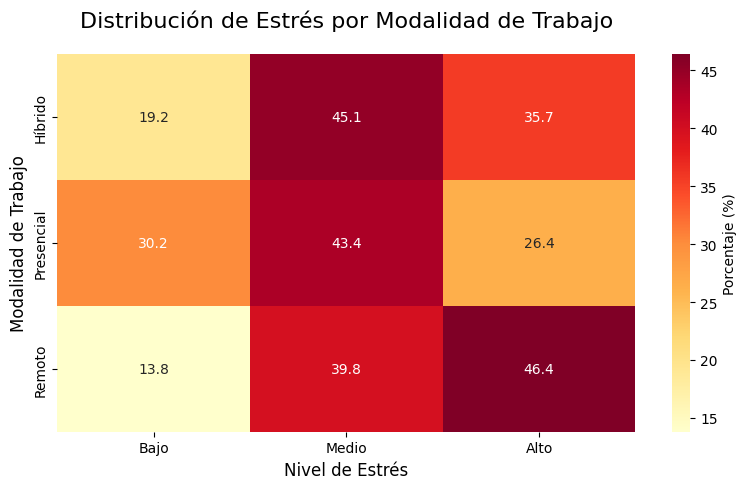

In [98]:
# extraer solo las columnas de burnout
tabla_burnout_pct = final["Burnout (%)"]

plt.figure(figsize=(8,5))
sns.heatmap(
    tabla_burnout_pct,
    annot=True, fmt=".1f", cmap="YlOrRd",
    cbar_kws={'label': 'Porcentaje (%)'}
)

plt.title("Distribución de Estrés por Modalidad de Trabajo", fontsize=16, pad=20)
plt.xlabel("Nivel de Estrés", fontsize=12)
plt.ylabel("Modalidad de Trabajo", fontsize=12)
plt.tight_layout()
plt.show()

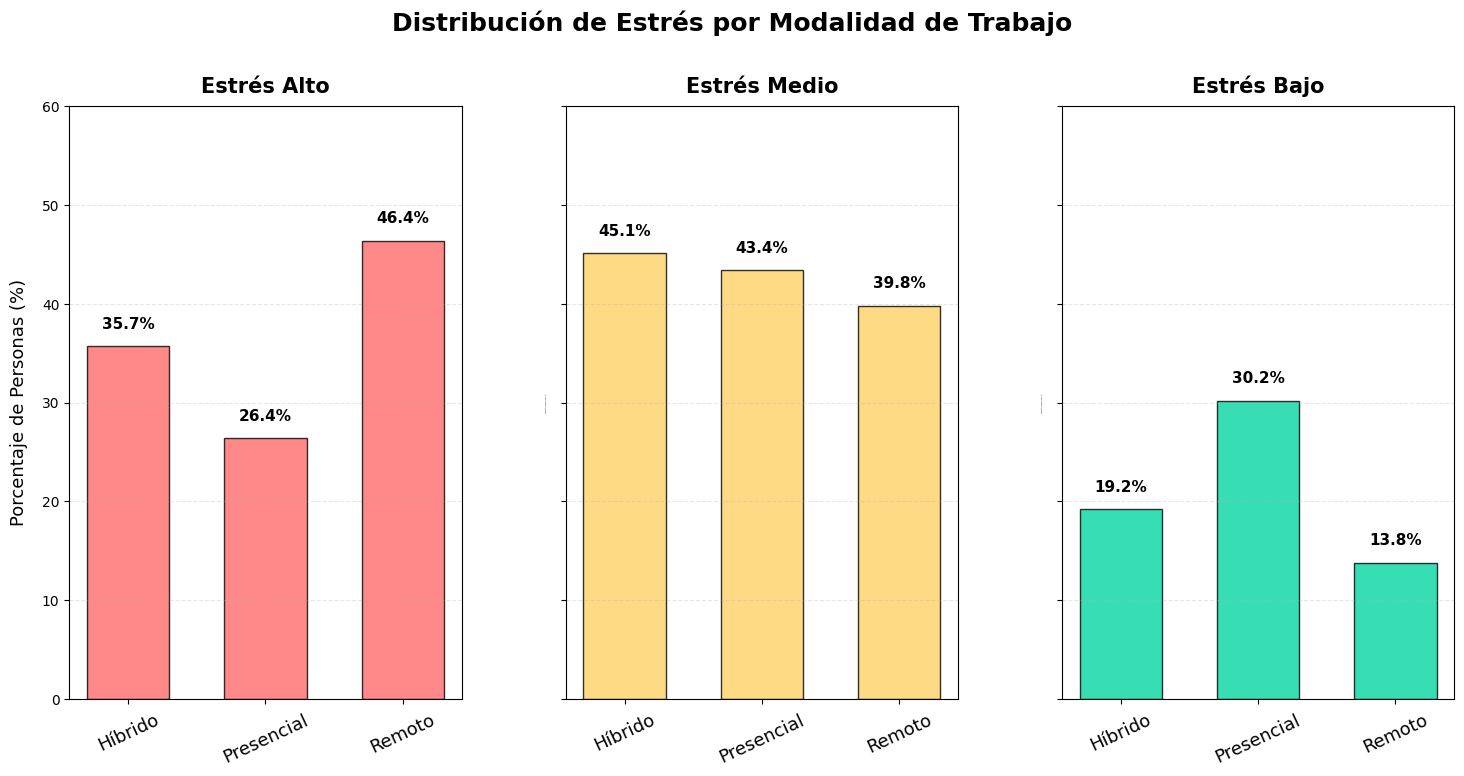

In [99]:
tabla_estres_pct = final["Burnout (%)"]
fig, axes = plt.subplots(1, 3, figsize=(15, 8), sharey=True)
niveles_estres = ['Alto', 'Medio', 'Bajo']
colores = ['#FF6B6B', '#FFD166', '#06D6A0']  # Colores diferentes: rojo, amarillo, verde
for i, (nivel, color_actual) in enumerate(zip(niveles_estres, colores)):
    ax = axes[i]
    datos_nivel = tabla_estres_pct[nivel]

    barras = ax.bar(datos_nivel.index, datos_nivel.values,
                    color=color_actual, width=0.6, alpha=0.8,
                    edgecolor='black', linewidth=1)

    ax.set_title(f'Estrés {nivel}', fontsize=15, pad=10, fontweight='bold')
    ax.set_ylabel('Porcentaje de Personas (%)', fontsize=13 if i == 0 else 0, labelpad=10)
    ax.set_ylim(0, 60)
    ax.tick_params(axis='x', rotation=25, labelsize=13, pad=5)
    
    # Añadir grid
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    for b in barras:
        h = b.get_height()
        ax.text(b.get_x() + b.get_width()/2,
                h + 1.5, f'{h:.1f}%', ha='center', va='bottom', 
                fontsize=11, fontweight='bold')

plt.suptitle('Distribución de Estrés por Modalidad de Trabajo', fontsize=18, fontweight='bold')
plt.tight_layout(pad=2, w_pad=6)
plt.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_4564\1228148946.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


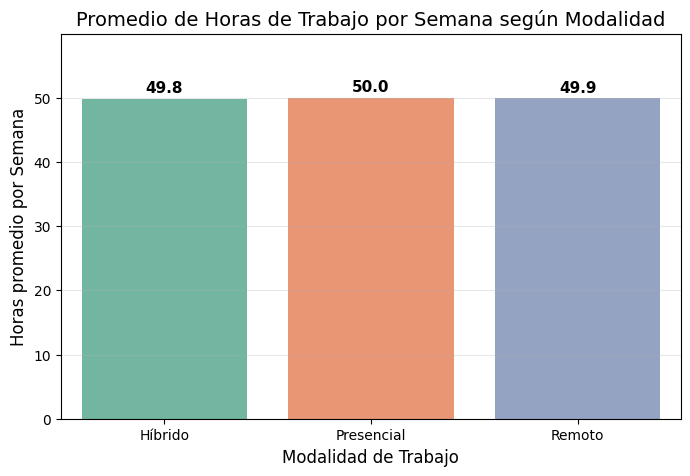

In [107]:
promedios = data.groupby('Ubicación_de_trabajo')['Horas_por_semana'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(
    data=promedios,
    x='Ubicación_de_trabajo',
    y='Horas_por_semana',
    palette='Set2'
)

# Agregar valores sobre cada barra
for i, row in promedios.iterrows():
    plt.text(i, row['Horas_por_semana'] + 0.5, f"{row['Horas_por_semana']:.1f}",
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Promedio de Horas de Trabajo por Semana según Modalidad', fontsize=14)
plt.xlabel('Modalidad de Trabajo', fontsize=12)
plt.ylabel('Horas promedio por Semana', fontsize=12)
plt.ylim(0, promedios['Horas_por_semana'].max() + 10)
plt.grid(axis='y', alpha=0.3)
plt.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_4564\673537064.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(["Ubicación_de_trabajo", "Rango_de_horas"])["Puntuación_de_aislamiento_social"]


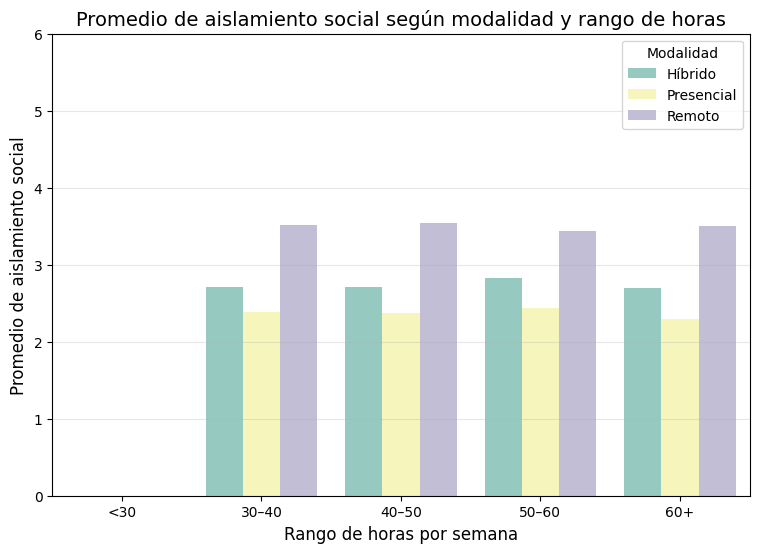

In [102]:
data["Rango_de_horas"] = pd.cut(
    data["Horas_por_semana"],
    bins=[0, 30, 40, 50, 60, 80],
    labels=["<30", "30–40", "40–50", "50–60", "60+"]
)

# Calcular promedio de aislamiento social por modalidad y rango de horas
tabla_aislamiento = (
    data.groupby(["Ubicación_de_trabajo", "Rango_de_horas"])["Puntuación_de_aislamiento_social"]
    .mean()
    .reset_index()
)

# Gráfico de barras
plt.figure(figsize=(9, 6))
sns.barplot(
    data=tabla_aislamiento,
    x="Rango_de_horas",
    y="Puntuación_de_aislamiento_social",
    hue="Ubicación_de_trabajo",
    palette="Set3"
)

plt.title("Promedio de aislamiento social según modalidad y rango de horas", fontsize=14)
plt.xlabel("Rango de horas por semana", fontsize=12)
plt.ylabel("Promedio de aislamiento social", fontsize=12)
plt.ylim(0, data["Puntuación_de_aislamiento_social"].max()+1)  # ajustar límite según datos
plt.grid(axis="y", alpha=0.3)
plt.legend(title="Modalidad")
plt.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_4564\121924530.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(["Ubicación_de_trabajo", "Rango_de_horas"])["Equilibrio_entre_vida_laboral_y_personal"]


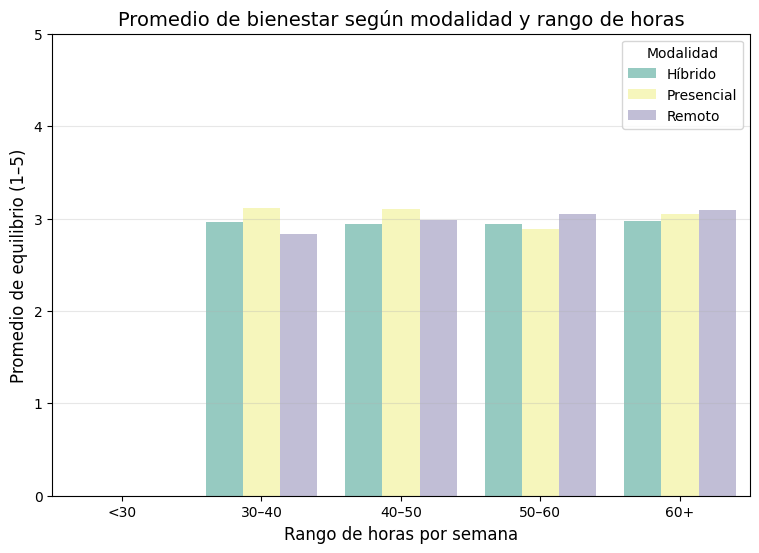

In [118]:
data["Rango_de_horas"] = pd.cut(
    data["Horas_por_semana"],
    bins=[0, 30, 40, 50, 60, 80],
    labels=["<30", "30–40", "40–50", "50–60", "60+"]
)

# Calcular promedio del equilibrio por modalidad y rango
tabla = (
    data.groupby(["Ubicación_de_trabajo", "Rango_de_horas"])["Equilibrio_entre_vida_laboral_y_personal"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(9, 6))
sns.barplot(
    data=tabla,
    x="Rango_de_horas",
    y="Equilibrio_entre_vida_laboral_y_personal",
    hue="Ubicación_de_trabajo",
    palette="Set3"
)

plt.title("Promedio de bienestar según modalidad y rango de horas", fontsize=14)
plt.xlabel("Rango de horas por semana", fontsize=12)
plt.ylabel("Promedio de equilibrio (1–5)", fontsize=12)
plt.ylim(0, 5)
plt.grid(axis="y", alpha=0.3)
plt.legend(title="Modalidad")
plt.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_4564\3611540128.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df_temp.groupby(["Ubicación_de_trabajo","Rango_de_horas"])["Nivel_de_agotamiento_num"].mean().reset_index()


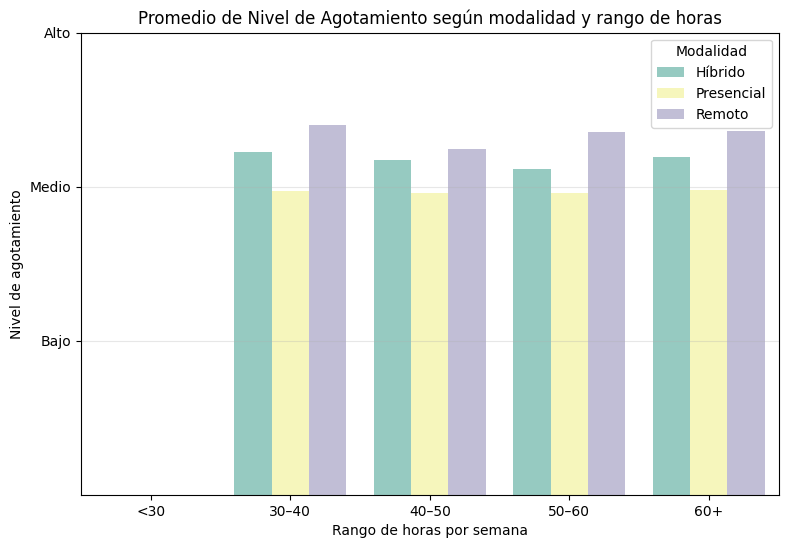

In [ ]:
df_temp = data.copy()
df_temp.columns = df_temp.columns.str.strip()

# Mapear niveles a números
nivel_map = {"Bajo": 1, "Medio": 2, "Alto": 3}
df_temp["Nivel_de_agotamiento_num"] = df_temp["Nivel_de_agotamiento"].map(nivel_map)

# Crear rangos de horas
df_temp["Rango_de_horas"] = pd.cut(df_temp["Horas_por_semana"],
                                   bins=[0,30,40,50,60,80],
                                   labels=["<30","30–40","40–50","50–60","60+"])

# Calcular promedio de agotamiento por modalidad y rango
tabla = df_temp.groupby(["Ubicación_de_trabajo","Rango_de_horas"])["Nivel_de_agotamiento_num"].mean().reset_index()

# Graficar
plt.figure(figsize=(9,6))
sns.barplot(data=tabla, x="Rango_de_horas", y="Nivel_de_agotamiento_num", hue="Ubicación_de_trabajo", palette="Set3")
plt.ylim(0,3)
plt.yticks([1,2,3], ["Bajo","Medio","Alto"])
plt.title("Promedio de Nivel de Agotamiento según modalidad y rango de horas")
plt.xlabel("Rango de horas por semana")
plt.ylabel("Nivel de agotamiento")
plt.grid(axis="y", alpha=0.3)
plt.legend(title="Modalidad")
plt.show()

In [115]:
data

,Fecha_de_encuesta,Edad,Región,Rol_laboral,Ubicación_de_trabajo,Horas_por_semana,Estado_de_salud_mental,Nivel_de_agotamiento,Equilibrio_entre_vida_laboral_y_personal,Problemas_de_salud_físico,Puntuación_de_aislamiento_social,Rango_salarial,Rango_de_horas,Nivel_de_agotamiento_num
0,2025-06-01,27,Asia,Data Analyst,Presencial,64,Stress Disorder,Alto,3,Shoulder Pain; Neck Pain,2,$40K-60K,61-80,3
1,2025-06-01,37,Asia,Data Analyst,Presencial,37,Stress Disorder,Alto,4,Back Pain,2,$80K-100K,31-40,3
2,2025-06-01,32,Africa,Business Analyst,Presencial,36,ADHD,Alto,3,Shoulder Pain; Eye Strain,2,$80K-100K,31-40,3
3,2025-06-01,40,Europe,Data Analyst,Presencial,63,ADHD,Medio,1,Shoulder Pain; Eye Strain,2,$60K-80K,61-80,2
4,2025-06-01,30,South America,DevOps Engineer,Híbrido,65,NaN,Medio,5,NaN,4,$60K-80K,61-80,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3152,2025-06-26,62,South America,Data Analyst,Híbrido,38,PTSD,Medio,4,Shoulder Pain; Neck Pain,3,$80K-100K,31-40,2
3153,2025-06-26,24,South America,Software Engineer,Remoto,54,NaN,Medio,4,Eye Strain,4,$100K-120K,51-60,2
3154,2025-06-26,45,North America,HR Manager,Presencial,59,PTSD,Medio,1,Shoulder Pain,3,$40K-60K,51-60,2
3155,2025-06-26,38,North America,Operations Manager,Presencial,52,Depression,Medio,3,Shoulder Pain; Eye Strain; Neck Pain,5,$80K-100K,51-60,2
